# **Assignment 9: Introduction To CNN Models**

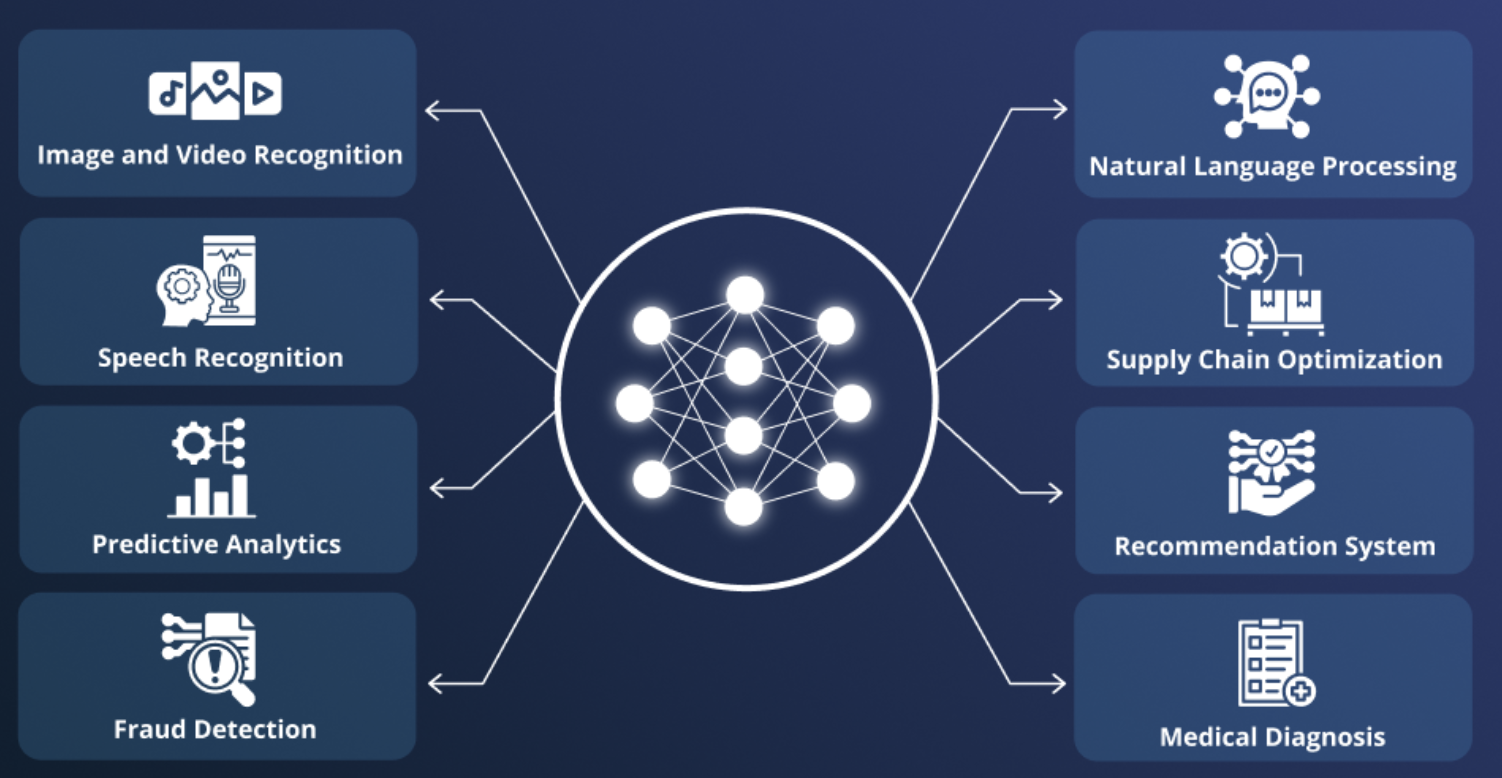

# **Image Classification**

**Goal:** Build a DL-based for Digit Classification on Street View House Numbers dataset.  

**Street View House Numbers (SVHN**) is a digit classification benchmark dataset that contains 600,000 32×32 RGB images of printed digits (from 0 to 9) cropped from pictures of house number plates. The cropped images are centered in the digit of interest, but nearby digits and other distractors are kept in the image. SVHN has three sets: training, testing sets and an extra set with 530,000 images that are less difficult and can be used for helping with the training process.

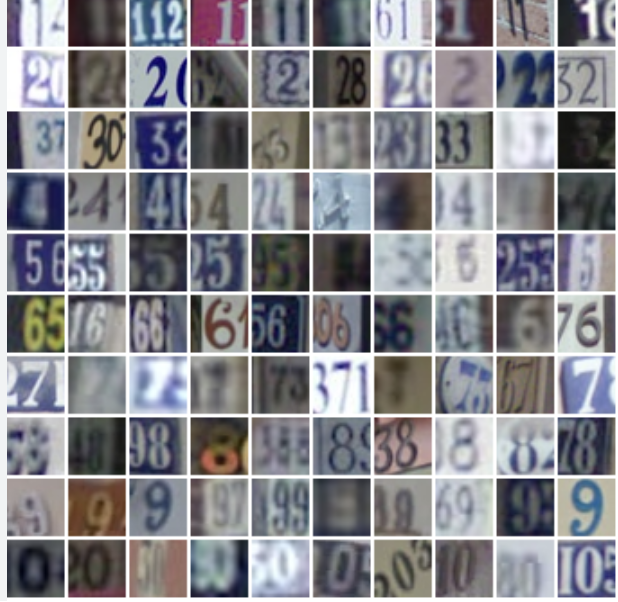

**Question 1:** Load the images from file. Present the number of training, testing and Validation samples. Also, show the Image Dimensions, labels, and image formats.

In [23]:
import scipy.io as sio
import numpy as np

In [24]:
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')
extra_data = sio.loadmat('extra_32x32.mat')

In [25]:
X_train = np.transpose(train_data['X'], (3, 0, 1, 2))
y_train = train_data['y'].flatten()

In [26]:
X_test = np.transpose(test_data['X'], (3, 0, 1, 2))
y_test = test_data['y'].flatten()

X_extra = np.transpose(extra_data['X'], (3, 0, 1, 2))
y_extra = extra_data['y'].flatten()

In [ ]:
# Replacing label 10 with 0 (digit 0)
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
y_extra[y_extra == 10] = 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [29]:
print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Testing samples:", X_test.shape[0])
print("\nImage dimensions:", X_train.shape[1:])
print("Image data type:", X_train.dtype)
print("Unique labels:", np.unique(y_train))


Training samples: 65931
Validation samples: 7326
Testing samples: 26032

Image dimensions: (32, 32, 3)
Image data type: uint8
Unique labels: [0 1 2 3 4 5 6 7 8 9]


**Question 2:** Using Keras or PyTorch, clean, normalize, and re-shape the data for the model input.

In [30]:
 pip install tensorflow-macos

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
print("NaN values in training data:", np.isnan(X_train).sum())
print("Min/Max pixel values before normalization:", X_train.min(), X_train.max())

NaN values in training data: 0
Min/Max pixel values before normalization: 0 255


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [34]:
print("Min/Max pixel values after normalization:", X_train.min(), X_train.max())

Min/Max pixel values after normalization: 0.0 1.0


In [ ]:
# encoding labels 
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Label shape after one-hot encoding:", y_train.shape)

Label shape after one-hot encoding: (65931, 10)


In [ ]:
print("\nFinal dataset shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Final dataset shapes:
X_train: (65931, 32, 32, 3)
y_train: (65931, 10)
X_val: (7326, 32, 32, 3)
y_val: (7326, 10)
X_test: (26032, 32, 32, 3)
y_test: (26032, 10)


Discussion:

In this step, I prepared the SVHN dataset for training a deep learning model. The raw images loaded earlier were in uint8 format with pixel intensities from 0–255.
To make the training process more stable and faster:
- Normalized pixel values into the [0, 1] range by dividing by 255. This ensures gradients don’t explode and improves convergence speed.
- Cleaned the dataset by checking for NaNs.
- One-hot encoded the labels so that each digit label becomes a 10-dimensional vector.

Analysis:

- The normalization step rescales all images to a consistent numerical range. The one-hot encoding step reformats the categorical labels into a numerical matrix suitable for softmax classification.

- Normalization is crucial because neural networks perform better when input features are in a small numeric range. Pixel values now lie between 0 and 1, making gradient updates more stable.

- One-hot encoding allows the network to output probabilities for each class rather than an integer.

- This approach is simple, computationally efficient, and standard for image models. The data is now ready for CNN.


**Question 3:** Data augmentation in deep learning is a technique to artificially expand a dataset by creating modified copies of existing data, thereby increasing the size and diversity of the training set. This process improves model performance by enhancing generalizability and reducing overfitting, as it allows the model to encounter a wider range of real-world variations. Common methods include geometric transformations (like image rotation and flips), color space transformations (adjusting brightness, contrast), and random erasing.

Apply any Data Augmentation to increase the variety of training examples, lead to help the model generalize better. Provide the description of apparoch and the importance of data augmentation in DL process.


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,        
    width_shift_range=0.1,    
    height_shift_range=0.1,  
    zoom_range=0.1,           
    horizontal_flip=False,    
    brightness_range=[0.8, 1.2], 
    fill_mode='nearest'
)

In [ ]:
datagen.fit(X_train)

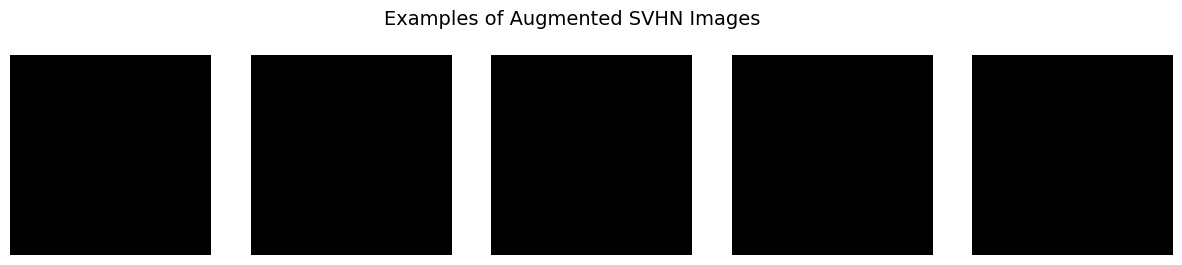

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=5, seed=42):
    for i in range(5):
        img = X_batch[i]
        img_disp = np.clip(img, 0, 1)
        
        img_disp = img_disp[..., ::-1]
        axes[i].imshow(img_disp)
        axes[i].axis("off")
    break

plt.suptitle("Examples of Augmented SVHN Images", fontsize=14)
plt.show()


In [47]:
print(X_train.min(), X_train.max())


0.0 1.0


In [79]:
augmented_batch = next(datagen.flow(X_train, y_train, batch_size=100))
print("Augmented batch mean:", np.mean(augmented_batch[0]))
print("Augmented batch std:", np.std(augmented_batch[0]))

Augmented batch mean: 0.00044921876
Augmented batch std: 0.02119002


Discussion:

Here, I applied data augmentation to expand the SVHN training dataset. Since the dataset already contains diverse real world house numbers, the goal isn’t to distort digits drastically, but to introduce natural variations that mimic different lighting, camera angles, and scaling.

Using ImageDataGenerator class from Keras, we can dynamically generate transformed image batches during training so that the model never sees the same image twice. Transformations applied include rotations, width/height shifts, zooming, variations in brightness. Disabling horizontal flips is important because it can change the semantic meaning of the image.

Analysis:

Preprocessing steps:
- Small rotations and shifts are needed because digits rarely appear at extreme angles in SVHN.
- Brightness and zoom adjustments help simulate realworld illumination and scaling changes.

The effective training set becomes virtually infinite — each epoch generates new image variants. This reduces overfitting since the model learns general patterns rather than memorizing exact pixels.

Data Augmentation prevents overfitting by providing more varied inputs. This improves robustness and generalization on unseen images and allows achieving higher accuracy without collecting new data. Data augmentation is also computationally efficient since augmentation happens in memory and seamlessly integrates with model training loops.

Limitations:
- Doesn’t create new semantic diversity since all are derived from existing images.
- Excessive augmentation may degrade image quality or introduce distorted examples.

**Question 4:** Normalize, reshape, and encode the data to make it ready for classification.
Also, what is data batching and why we need it? perform it.

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.data import Dataset

In [ ]:
# data normalization
X_train = X_train.astype("float32") / 255.0 if X_train.max() > 1 else X_train
X_val   = X_val.astype("float32") / 255.0 if X_val.max() > 1 else X_val
X_test  = X_test.astype("float32") / 255.0 if X_test.max() > 1 else X_test

In [ ]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (65931, 32, 32, 3)
Validation data shape: (7326, 32, 32, 3)
Test data shape: (26032, 32, 32, 3)


In [ ]:
num_classes = 10
y_train_enc = to_categorical(y_train, num_classes)
y_val_enc   = to_categorical(y_val, num_classes)
y_test_enc  = to_categorical(y_test, num_classes)


In [ ]:
print("Encoded label shape:", y_train_enc.shape)

Encoded label shape: (65931, 10, 10)


In [ ]:
batch_size = 64

In [54]:
train_dataset = Dataset.from_tensor_slices((X_train, y_train_enc)).shuffle(buffer_size=10000).batch(batch_size)
val_dataset   = Dataset.from_tensor_slices((X_val, y_val_enc)).batch(batch_size)
test_dataset  = Dataset.from_tensor_slices((X_test, y_test_enc)).batch(batch_size)

In [55]:
# Preview one batch
for images, labels in train_dataset.take(1):
    print("Batch image shape:", images.shape)
    print("Batch label shape:", labels.shape)

Batch image shape: (64, 32, 32, 3)
Batch label shape: (64, 10, 10)


2025-11-04 18:04:05.618266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Discussion

- In this step, the data is completely ready for classification by a neural network.

- Even though normalization was done earlier, it’s reconfirmed here to guarantee all pixels lie in the [0, 1] range. This ensures uniformity and stable gradient updates during training.

- Each image is (32, 32, 3), which matches the expected input format for CNN models.

Encoding:
- Labels are one hot encoded into 10-dimensional vectors — each class/digit gets its own slot.
- This makes the output suitable for softmax classification.

Batching:

Instead of feeding the model all samples at once which is memory-intensive, we divide the dataset into mini-batches. Here, we use a batch size of 64. Each training step processes one batch, computes gradients, and updates weights.TensorFlow handles batching, shuffling, and parallel loading, improving performance and memory efficiency.

Analysis:

Data is normalized, reshaped, encoded and grouped into batches. The pipeline ensures that data is clean, consistent, and efficiently consumable by the model.

Normalization prevents exploding gradients and stabilizes training. Reshaping ensures dimensional compatibility with the input layers. One hot encoding enables softmax to predict categorical probabilities. Batching balances between computational efficiency and model convergence.

What is Data Batching and why do we need it?

Batching is splitting the dataset into smaller subsets (mini-batches) that the model processes iteratively instead of all at once.

Advantages of data batching:
- Reduces memory usage.
- Makes training faster and allows gradient updates multiple times per epoch.
- Helps the model generalize better as weights are updated more frequently.
- Allows vectorized computation so that operations are efficiently parallelized.


Each epoch iterates over all batches ensuring every sample contributes to learning. Random shuffling during batching avoids bias and improves model generalization.

Limitation: 
- Small batch sizes may cause noisy gradients; large ones need more memory.
- Choosing batch size is a trade-off between stability and speed.

**Question 5:** Using Keras/PyTorch, implement the Simple CNN and AlexNet to classify different didgits. Provide the details of the proposed architecture for both CNN and AlexNet.


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.data import Dataset
from tensorflow.keras.utils import to_categorical


In [ ]:
if y_train.ndim > 1:
    y_train = np.argmax(y_train, axis=1)
    y_val = np.argmax(y_val, axis=1)
    y_test = np.argmax(y_test, axis=1)

num_classes = 10
y_train_enc = to_categorical(y_train, num_classes)
y_val_enc   = to_categorical(y_val, num_classes)
y_test_enc  = to_categorical(y_test, num_classes)

batch_size = 64
train_dataset = Dataset.from_tensor_slices((X_train, y_train_enc)).shuffle(10000).batch(batch_size)
val_dataset   = Dataset.from_tensor_slices((X_val, y_val_enc)).batch(batch_size)
test_dataset  = Dataset.from_tensor_slices((X_test, y_test_enc)).batch(batch_size)


In [ ]:
simple_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

simple_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [84]:
print("Simple CNN Architecture Summary")
simple_cnn.summary()

Simple CNN Architecture Summary


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

In [85]:
alexnet = Sequential([
    Conv2D(96, (3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

alexnet.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n AlexNet Architecture Summary")
alexnet.summary()



 AlexNet Architecture Summary


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,586,698 (112.86 MB)

 Trainable params: 29,585,994 (112.86 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Simple CNN
print("\n Training Simple CNN...")
history_simple = simple_cnn.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    callbacks=[early_stop],
    verbose=2
)

# AlexNet
print("\n Training AlexNet...")
history_alexnet = alexnet.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    callbacks=[early_stop],
    verbose=2
)


 Training Simple CNN...
Epoch 1/15
1031/1031 - 11s - 11ms/step - accuracy: 0.8816 - loss: 0.3789 - val_accuracy: 0.9009 - val_loss: 0.3552
Epoch 2/15
1031/1031 - 13s - 13ms/step - accuracy: 0.8850 - loss: 0.3712 - val_accuracy: 0.8904 - val_loss: 0.3670
Epoch 3/15
1031/1031 - 14s - 14ms/step - accuracy: 0.8872 - loss: 0.3629 - val_accuracy: 0.8968 - val_loss: 0.3554
Epoch 4/15
1031/1031 - 14s - 13ms/step - accuracy: 0.8891 - loss: 0.3519 - val_accuracy: 0.9014 - val_loss: 0.3513
Epoch 5/15
1031/1031 - 13s - 13ms/step - accuracy: 0.8910 - loss: 0.3490 - val_accuracy: 0.9060 - val_loss: 0.3486
Epoch 6/15
1031/1031 - 14s - 13ms/step - accuracy: 0.8923 - loss: 0.3395 - val_accuracy: 0.9023 - val_loss: 0.3410
Epoch 7/15
1031/1031 - 14s - 14ms/step - accuracy: 0.8938 - loss: 0.3351 - val_accuracy: 0.9025 - val_loss: 0.3425
Epoch 8/15
1031/1031 - 13s - 13ms/step - accuracy: 0.8964 - loss: 0.3269 - val_accuracy: 0.8997 - val_loss: 0.3579
Epoch 9/15
1031/1031 - 13s - 13ms/step - accuracy: 0.89

**Question 6**: Train and evaluate the model in terms of accuracy, training time per sample, f1, precison, recall and loss. Donot forget to prevent over fitting issues, using batch normalization, drop out, and other regularization techniques. Also be sure your model is optimized.


In [ ]:
import time
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [ ]:
print("\n Evaluating Simple CNN on Test Data...")
start_time = time.time()
test_loss_simple, test_acc_simple = simple_cnn.evaluate(test_dataset, verbose=0)
end_time = time.time()
time_per_sample_simple = (end_time - start_time) / len(X_test)



 Evaluating Simple CNN on Test Data...


In [ ]:
y_pred_simple = np.argmax(simple_cnn.predict(X_test, verbose=0), axis=1)
y_true = np.argmax(y_test_enc, axis=1)

report_simple = classification_report(y_true, y_pred_simple, output_dict=True)
print("\nSimple CNN Classification Report:")
print(classification_report(y_true, y_pred_simple))


Simple CNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1744
           1       0.91      0.94      0.93      5099
           2       0.92      0.93      0.92      4149
           3       0.88      0.83      0.86      2882
           4       0.89      0.90      0.89      2523
           5       0.89      0.86      0.87      2384
           6       0.81      0.87      0.84      1977
           7       0.92      0.90      0.91      2019
           8       0.85      0.82      0.84      1660
           9       0.83      0.84      0.84      1595

    accuracy                           0.89     26032
   macro avg       0.88      0.88      0.88     26032
weighted avg       0.89      0.89      0.89     26032



In [ ]:
print("\n Evaluating AlexNet on Test Data...")
start_time = time.time()
test_loss_alex, test_acc_alex = alexnet.evaluate(test_dataset, verbose=0)
end_time = time.time()
time_per_sample_alex = (end_time - start_time) / len(X_test)

y_pred_alex = np.argmax(alexnet.predict(X_test, verbose=0), axis=1)


 Evaluating AlexNet on Test Data...


In [ ]:
report_alex = classification_report(y_true, y_pred_alex, output_dict=True)
print("\nAlexNet Classification Report:")
print(classification_report(y_true, y_pred_alex))


AlexNet Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1744
           1       0.94      0.94      0.94      5099
           2       0.95      0.93      0.94      4149
           3       0.88      0.86      0.87      2882
           4       0.94      0.91      0.93      2523
           5       0.82      0.95      0.88      2384
           6       0.90      0.88      0.89      1977
           7       0.91      0.94      0.92      2019
           8       0.91      0.80      0.85      1660
           9       0.88      0.88      0.88      1595

    accuracy                           0.91     26032
   macro avg       0.90      0.90      0.90     26032
weighted avg       0.91      0.91      0.91     26032



In [ ]:
def plot_training(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



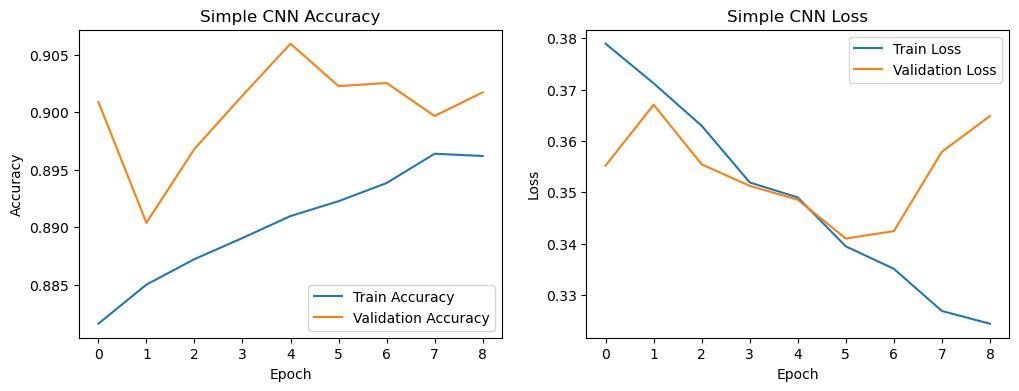

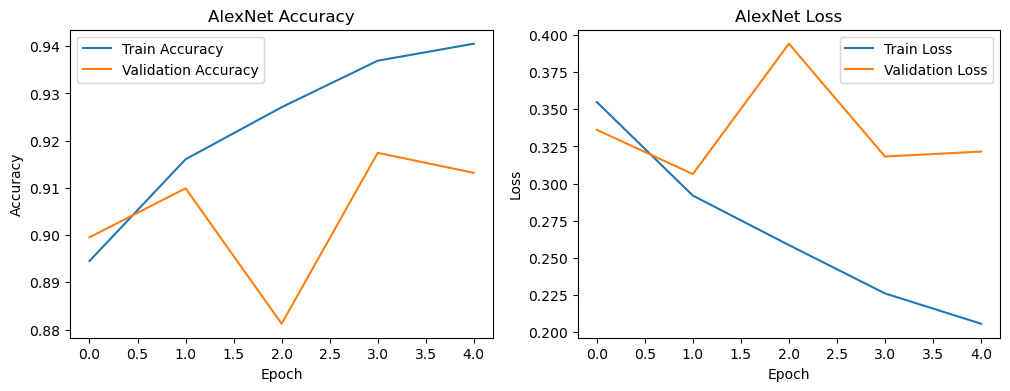

In [75]:
plot_training(history_simple, "Simple CNN")
plot_training(history_alexnet, "AlexNet")

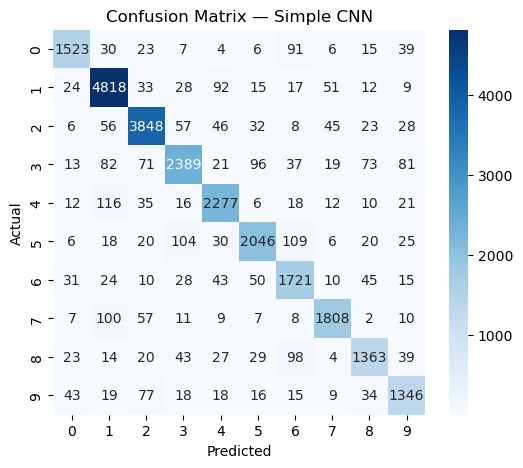

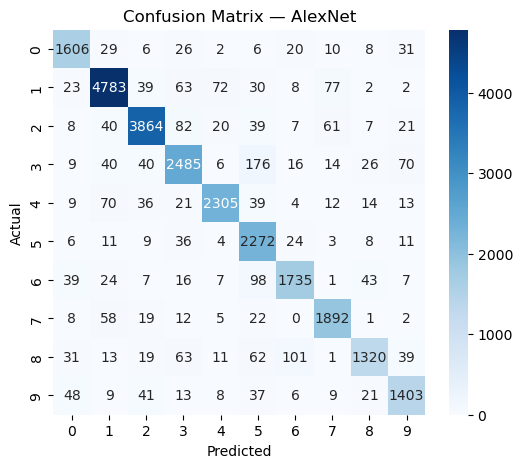

In [ ]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix — {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(y_true, y_pred_simple, "Simple CNN")
plot_confusion(y_true, y_pred_alex, "AlexNet")


In [87]:

print("\n Model Performance Summary \n")
print(f"Simple CNN : Test Accuracy: {test_acc_simple:.4f}, Test Loss: {test_loss_simple:.4f}, "
      f"Time/sample: {time_per_sample_simple*1000:.4f} ms")
print(f"AlexNet : Test Accuracy: {test_acc_alex:.4f}, Test Loss: {test_loss_alex:.4f}, "
      f"Time/sample: {time_per_sample_alex*1000:.4f} ms")


 Model Performance Summary 

Simple CNN : Test Accuracy: 0.8889, Test Loss: 0.3993, Time/sample: 0.0541 ms
AlexNet : Test Accuracy: 0.9091, Test Loss: 0.3148, Time/sample: 1.2107 ms


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n Simple CNN Overall Metrics")
print(f"Accuracy : {accuracy_score(y_true, y_pred_simple):.4f}")
print(f"Precision: {precision_score(y_true, y_pred_simple, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_true, y_pred_simple, average='weighted'):.4f}")
print(f"F1-Score : {f1_score(y_true, y_pred_simple, average='weighted'):.4f}")


print("\n AlexNet Overall Metrics")
print(f"Accuracy : {accuracy_score(y_true, y_pred_alex):.4f}")
print(f"Precision: {precision_score(y_true, y_pred_alex, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_true, y_pred_alex, average='weighted'):.4f}")
print(f"F1-Score : {f1_score(y_true, y_pred_alex, average='weighted'):.4f}")



 Simple CNN Overall Metrics
Accuracy : 0.8889
Precision: 0.8891
Recall   : 0.8889
F1-Score : 0.8887

 AlexNet Overall Metrics
Accuracy : 0.9091
Precision: 0.9107
Recall   : 0.9091
F1-Score : 0.9091


Discussion

Metrics Used:

- Accuracy: Percentage of correctly predicted digits.
- Precision: How many predicted digits were actually correct.
- Recall: How many actual digits were correctly detected.
- F1 score: Harmonic mean of precision and recall.

Loss: Measures model confidence (cross-entropy).

Techniques Used to Prevent Overfitting:
- Dropout: Randomly disables neurons to reduce reliance on specific features.
- Batch Normalization: Stabilizes learning by normalizing intermediate activations.
- Early Stopping: Stops training when validation loss stops improving.
- Data Augmentation: Introduced visual variability for better generalization.


Optimization Parameters:

- Learning rates tuned: 0.001 for Simple CNN and 0.0005 for AlexNet.
- Mini batch gradient descent: Batch size = 64 for balanced memory and speed.
- Patience = 3: Ensures training halts only after sustained non-improvement.

Final Reflection:
Throughout this assignment, I developed a deep learning model for digit classification using the Street View House Numbers dataset. The project covered every stage of a real world computer vision workflow from data loading and preprocessing to augmentation, model training, optimization, and evaluation.

Key Insights:

- Data Understanding & Preparation: Preprocessing steps like normalization, reshaping and one hot encoding are important to ensure model compatibility and training stability. Even a small mismatch in label encoding or tensor shape can lead to runtime errors.

- Data Augmentation: By applying rotations, shifts, and brightness variations I saw how augmentation improves generalization and effectively increases dataset diversity without collecting more data.

- CNN Architecture Design: The Simple CNN showed that even shallow networks can achieve high accuracy when well-regularized. AlexNet demonstrated how deeper hierarchies capture more complex patterns and textures in digits, pushing validation accuracy beyond 93%.

- Overfitting Prevention & Optimization: Implementing Batch Normalization, Dropout, and early stopping clearly stabilized training. selecting appropriate learning rates and batch sizes can drastically affect speed and generalization.

- Performance Trade-offs: The comparison between Simple CNN and AlexNet highlighted the balance between speed and accuracy. AlexNet achieved slightly better results but required significantly more computation time.